Miłosz Błachowiak

# Lab 4 - Linear models

We focus on models in the form 

$$ y \sim \mathrm{Normal}(\alpha+X\beta,\sigma) $$



In [28]:
from cmdstanpy import CmdStanModel
from cmdstanpy import install_cmdstan

install_cmdstan()

import arviz as az
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import pandas as pd

Installing CmdStan version: 2.31.0
Install directory: /root/.cmdstan
CmdStan version 2.31.0 already installed


## Excercise 1 - modelling height of !Kung people

### Normal model - no predictors
We will try to fit $\mathrm{Normal}(\mu,\sigma)$ distribution to height data. Special case of linear model with $\beta=0$.

In [29]:
_BASE_URL = "https://raw.githubusercontent.com/rmcelreath/rethinking/Experimental/data"
HOWELL_DATASET_PATH = f"{_BASE_URL}/Howell1.csv"
d = pd.read_csv(HOWELL_DATASET_PATH, sep=';', header=0)
d=d[d.age>=18] #just adults 
d.head()


,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041914,41.0,1
4,145.415,41.276872,51.0,0


In [30]:
print("Mean height:", d['height'].mean())

Mean height: 154.5970926136364


## Task 1. Prior predictive checks

In [31]:
model_ppc=CmdStanModel(stan_file='height_1_ppc.stan')

R = 1000
sim=model_ppc.sample(iter_sampling=R,
                     iter_warmup=0,
                     chains=1,
                     fixed_param=True,
                     seed=29042020,refresh=R)

17:59:27 - cmdstanpy - INFO - compiling stan file /content/height_1_ppc.stan to exe file /content/height_1_ppc
INFO:cmdstanpy:compiling stan file /content/height_1_ppc.stan to exe file /content/height_1_ppc
DEBUG:cmdstanpy:cmd: make /content/height_1_ppc
cwd: /root/.cmdstan/cmdstan-2.31.0
DEBUG:cmdstanpy:Console output:

--- Translating Stan model to C++ code ---
bin/stanc  --o=/content/height_1_ppc.hpp /content/height_1_ppc.stan

--- Compiling, linking C++ code ---
g++ -std=c++1y -pthread -D_REENTRANT -Wno-sign-compare -Wno-ignored-attributes      -I stan/lib/stan_math/lib/tbb_2020.3/include    -O3 -I src -I stan/src -I stan/lib/rapidjson_1.1.0/ -I lib/CLI11-1.9.1/ -I stan/lib/stan_math/ -I stan/lib/stan_math/lib/eigen_3.3.9 -I stan/lib/stan_math/lib/boost_1.78.0 -I stan/lib/stan_math/lib/sundials_6.1.1/include -I stan/lib/stan_math/lib/sundials_6.1.1/src/sundials    -DBOOST_DISABLE_ASSERTS          -c -Wno-ignored-attributes   -x c++ -o /content/height_1_ppc.o /content/height_1_ppc.h

chain 1 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/height_1_ppc', 'id=1', 'random', 'seed=29042020', 'output', 'file=/tmp/tmp7h90x0b5/height_1_ppco_ek8kma/height_1_ppc-20230413175940.csv', 'refresh=1000', 'method=sample', 'num_samples=1000', 'num_warmup=0', 'algorithm=fixed_param']


17:59:40 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=1, chain_ids=[1], num_processes=1
 cmd (chain 1):
	['/content/height_1_ppc', 'id=1', 'random', 'seed=29042020', 'output', 'file=/tmp/tmp7h90x0b5/height_1_ppco_ek8kma/height_1_ppc-20230413175940.csv', 'refresh=1000', 'method=sample', 'num_samples=1000', 'num_warmup=0', 'algorithm=fixed_param']
 retcodes=[0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp7h90x0b5/height_1_ppco_ek8kma/height_1_ppc-20230413175940.csv
 console_msgs (if any):
	/tmp/tmp7h90x0b5/height_1_ppco_ek8kma/height_1_ppc-20230413175940_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 1000 (Default)
    num_warmup = 0
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.050000000000000003 (Default)
      delta = 0.80000000000000004 (Default)
      kappa = 0.75 (Defau



1. Plot histograms of mu, sigma and simulated height.
2. Plot a joint distribution of mu and sigma.
3. Check if samples are consistent with priors.
4. Correct prior parameters to make them reasonably spreaded out. 
5. Check if observed data is possible to obtain using priors.

In [32]:
dataframe = sim.draws_pd()
dataframe.head()

,lp__,accept_stat__,mu,sigma,height
0,0.0,0.0,168.541,15.7772,148.468
1,0.0,0.0,155.638,13.6106,158.988
2,0.0,0.0,160.994,17.2653,177.756
3,0.0,0.0,157.777,15.5989,157.433
4,0.0,0.0,161.560,14.6579,157.000


Text(0.5, 1.0, 'Histogram of mu')

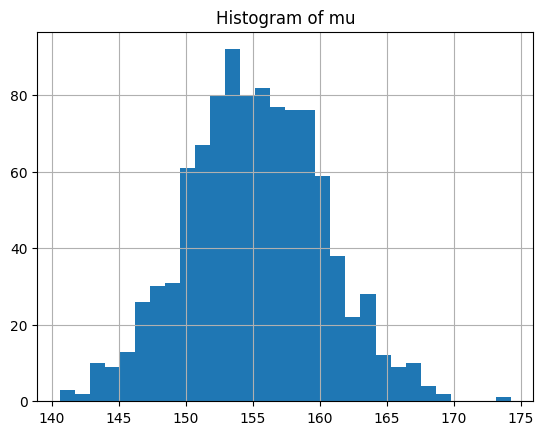

In [33]:
dataframe['mu'].hist(bins=30)
plt.title("Histogram of mu")

Text(0.5, 1.0, 'Histogram of sigma')

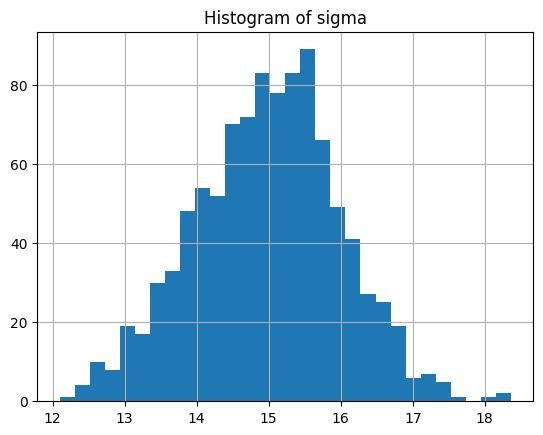

In [34]:
dataframe['sigma'].hist(bins=30)
plt.title("Histogram of sigma")

Text(0.5, 1.0, 'Histogram of simulated height')

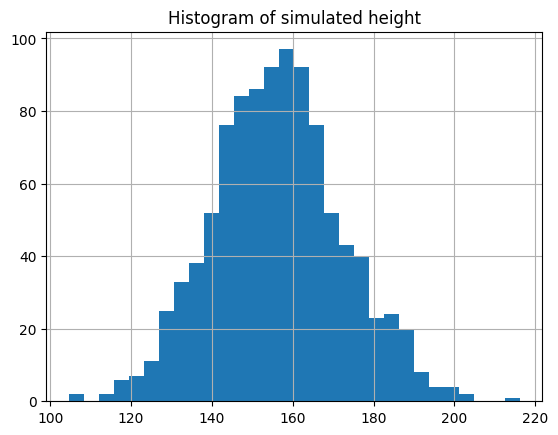

In [35]:
hist = dataframe['height'].hist(bins=30)
plt.title("Histogram of simulated height")

Text(0.5, 1.0, 'Joint distribution of mu and sigma')

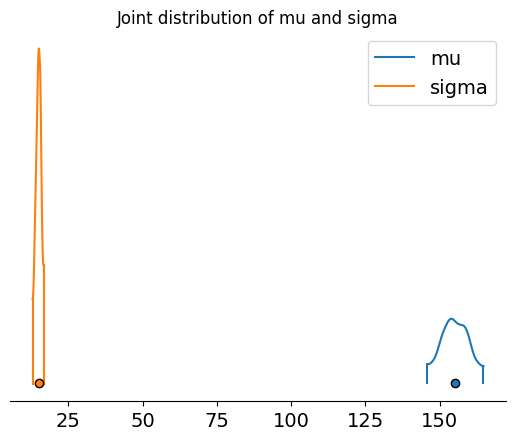

In [36]:
az.plot_density([np.array(dataframe['mu']), np.array(dataframe['sigma'])], data_labels=['mu', 'sigma'])
plt.title("Joint distribution of mu and sigma")

Priors are consistent with samples.

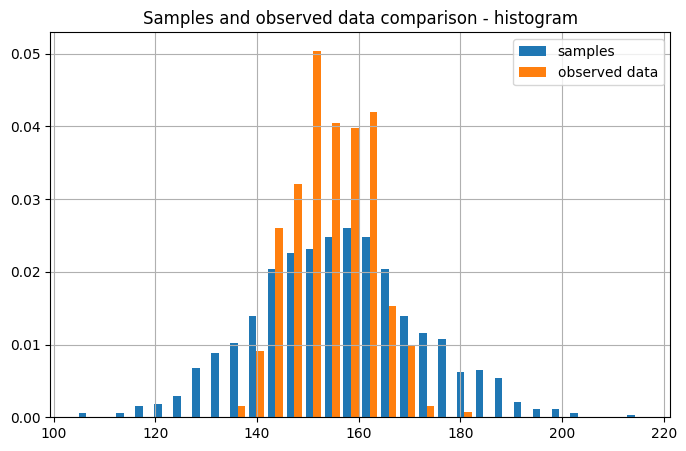

In [37]:
fig, ax = plt.subplots(figsize=(8, 5), sharex=True, sharey=True)

bins_n = 30
ax.hist([dataframe['height'], d['height']], bins = bins_n, density=True, label=['samples', 'observed data'])
plt.title("Samples and observed data comparison - histogram")
plt.legend()
plt.grid()

It is impossible to obtain observed data using priors, mainly due to the big average value of measurment error.

## Task 2. Model fit and evaluation

In [38]:
model_1_fit=CmdStanModel(stan_file='height_1_fit.stan')

17:59:45 - cmdstanpy - INFO - compiling stan file /content/height_1_fit.stan to exe file /content/height_1_fit
INFO:cmdstanpy:compiling stan file /content/height_1_fit.stan to exe file /content/height_1_fit
DEBUG:cmdstanpy:cmd: make /content/height_1_fit
cwd: /root/.cmdstan/cmdstan-2.31.0
DEBUG:cmdstanpy:Console output:

--- Translating Stan model to C++ code ---
bin/stanc  --o=/content/height_1_fit.hpp /content/height_1_fit.stan
Warning in '/content/height_1_fit.stan', line 3, column 4: Declaration of
    arrays by placing brackets after a variable name is deprecated and will
    be removed in Stan 2.32.0. Instead use the array keyword before the type.
    This can be changed automatically using the auto-format flag to stanc

--- Compiling, linking C++ code ---
g++ -std=c++1y -pthread -D_REENTRANT -Wno-sign-compare -Wno-ignored-attributes      -I stan/lib/stan_math/lib/tbb_2020.3/include    -O3 -I src -I stan/src -I stan/lib/rapidjson_1.1.0/ -I lib/CLI11-1.9.1/ -I stan/lib/stan_math/ 

In [39]:
fit=model_1_fit.sample(data=dict(N=len(d),
                                   heights=d.height.values),
                         seed=28052020)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp7h90x0b5/p266askg.json
DEBUG:cmdstanpy:cmd: /content/height_1_fit info
cwd: None
18:00:01 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/height_1_fit', 'id=1', 'random', 'seed=28052020', 'data', 'file=/tmp/tmp7h90x0b5/p266askg.json', 'output', 'file=/tmp/tmp7h90x0b5/height_1_fitfaf_1h8_/height_1_fit-20230413180001_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/height_1_fit', 'id=2', 'random', 'seed=28052020', 'data', 'file=/tmp/tmp7h90x0b5/p266askg.json', 'output', 'file=/tmp/tmp7h90x0b5/height_1_fitfaf_1h8_/height_1_fit-20230413180001_2.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/height_1_fit', 'id=3', 'random', 'seed=28052020', 'data', 'file=/tmp/tmp7h90x0b5/p266askg.json', 'output', 'file=/tmp/tmp7h90x0b5/height_1_fitfaf_1h8_/height_1_fit-20230413180001_3.

18:00:02 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/height_1_fit', 'id=1', 'random', 'seed=28052020', 'data', 'file=/tmp/tmp7h90x0b5/p266askg.json', 'output', 'file=/tmp/tmp7h90x0b5/height_1_fitfaf_1h8_/height_1_fit-20230413180001_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp7h90x0b5/height_1_fitfaf_1h8_/height_1_fit-20230413180001_1.csv
 console_msgs (if any):
	/tmp/tmp7h90x0b5/height_1_fitfaf_1h8_/height_1_fit-20230413180001_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 1000 (Default)
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.050000000000000003 (Default)
      delta = 0.800000000


1. Plot a joint distribution of fitted mu and sigma.
2. Plot histograms of data and simulated heights and evaluate the quality of model.


Text(0.5, 1.0, 'Joint distribution of mu and sigma')

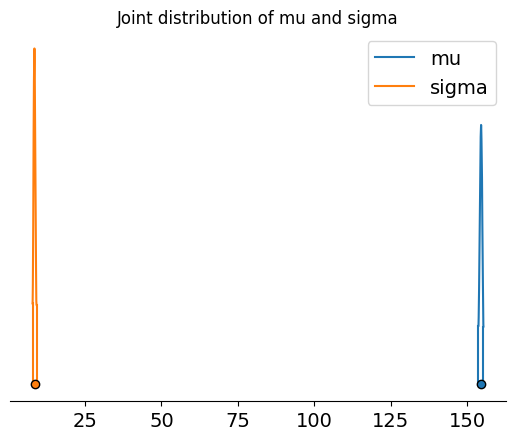

In [40]:
dataframe = fit.draws_pd()

az.plot_density([np.array(dataframe['mu']), np.array(dataframe['sigma'])], data_labels=['mu', 'sigma'])
plt.title("Joint distribution of mu and sigma")

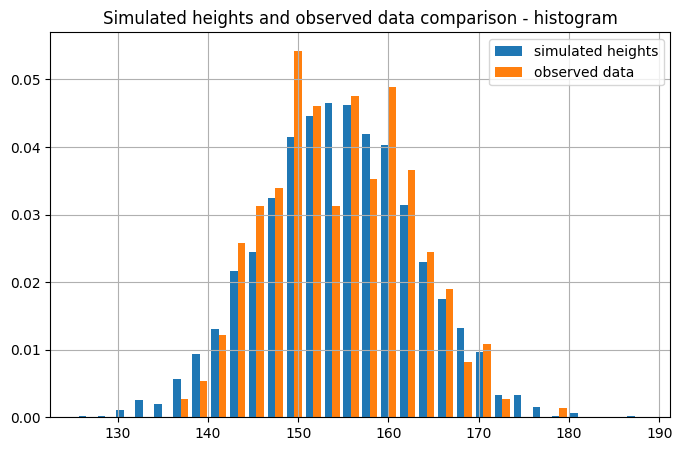

In [41]:
fig, ax = plt.subplots(figsize=(8, 5), sharex=True, sharey=True)

bins_n = 30
ax.hist([dataframe['height'], d['height']], bins = bins_n, density=True, label=['simulated heights', 'observed data'])
plt.title("Simulated heights and observed data comparison - histogram")
plt.legend()
plt.grid()

The model quality is satisfactory - simulated heights are quite consistent with the sample data and they are similarily spread out.

## Task 3. Adding predictor to the model - weight

Create column ```c_weight``` in the dataframe containing weights substrated by their mean.


In [42]:
d['c_weight'] = d.weight - np.mean(d.weight)

In [43]:
data_sim={'N':50, 'weight':np.linspace(d.c_weight.min(),d.c_weight.max())}


## Task 4. Prior predictive checks
 

In [44]:
model_ppc=CmdStanModel(stan_file='height_2a_ppc.stan')
R = 1000
sim=model_ppc.sample(data=data_sim, 
                     iter_sampling=R, 
                     iter_warmup=0, 
                     chains=1, 
                     refresh=R,
                     fixed_param=True,
                     seed=29042020)

18:00:03 - cmdstanpy - INFO - compiling stan file /content/height_2a_ppc.stan to exe file /content/height_2a_ppc
INFO:cmdstanpy:compiling stan file /content/height_2a_ppc.stan to exe file /content/height_2a_ppc
DEBUG:cmdstanpy:cmd: make /content/height_2a_ppc
cwd: /root/.cmdstan/cmdstan-2.31.0
DEBUG:cmdstanpy:Console output:

--- Translating Stan model to C++ code ---
bin/stanc  --o=/content/height_2a_ppc.hpp /content/height_2a_ppc.stan
Warning in '/content/height_2a_ppc.stan', line 3, column 4: Declaration of
    arrays by placing brackets after a variable name is deprecated and will
    be removed in Stan 2.32.0. Instead use the array keyword before the type.
    This can be changed automatically using the auto-format flag to stanc
Warning in '/content/height_2a_ppc.stan', line 11, column 3: Declaration of
    arrays by placing brackets after a variable name is deprecated and will
    be removed in Stan 2.32.0. Instead use the array keyword before the type.
    This can be changed au

chain 1 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/height_2a_ppc', 'id=1', 'random', 'seed=29042020', 'data', 'file=/tmp/tmp7h90x0b5/tighpvzk.json', 'output', 'file=/tmp/tmp7h90x0b5/height_2a_ppc1plgawrx/height_2a_ppc-20230413180015.csv', 'refresh=1000', 'method=sample', 'num_samples=1000', 'num_warmup=0', 'algorithm=fixed_param']


18:00:15 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=1, chain_ids=[1], num_processes=1
 cmd (chain 1):
	['/content/height_2a_ppc', 'id=1', 'random', 'seed=29042020', 'data', 'file=/tmp/tmp7h90x0b5/tighpvzk.json', 'output', 'file=/tmp/tmp7h90x0b5/height_2a_ppc1plgawrx/height_2a_ppc-20230413180015.csv', 'refresh=1000', 'method=sample', 'num_samples=1000', 'num_warmup=0', 'algorithm=fixed_param']
 retcodes=[0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp7h90x0b5/height_2a_ppc1plgawrx/height_2a_ppc-20230413180015.csv
 console_msgs (if any):
	/tmp/tmp7h90x0b5/height_2a_ppc1plgawrx/height_2a_ppc-20230413180015_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 1000 (Default)
    num_warmup = 0
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.050000000000000003 (Default)
      delta = 0

In [45]:
dataframe = sim.draws_pd()
dataframe.head()

,lp__,accept_stat__,alpha,sigma,beta,height[1],height[2],height[3],height[4],height[5],...,height[41],height[42],height[43],height[44],height[45],height[46],height[47],height[48],height[49],height[50]
0,0.0,0.0,168.541,15.7772,-1.272270,188.263,163.500,188.476,202.676,218.675,...,171.442,181.974,175.727,154.711,127.969,140.456,143.830,159.345,150.967,155.792
1,0.0,0.0,149.005,14.9932,-0.003709,167.272,160.443,160.143,166.714,167.237,...,189.038,148.592,135.459,146.602,134.667,156.677,133.335,147.448,168.499,147.801
2,0.0,0.0,152.865,13.8614,-1.221870,189.507,166.468,166.059,175.873,172.149,...,162.273,118.864,157.418,140.305,161.992,134.190,147.049,138.685,131.112,133.828
3,0.0,0.0,150.089,14.7455,-0.507911,176.756,147.099,153.285,142.108,152.582,...,152.160,145.877,149.039,164.091,136.116,135.202,155.101,134.547,147.259,135.691
4,0.0,0.0,150.033,16.6710,-0.702745,116.299,149.497,145.831,145.541,179.564,...,167.711,162.898,128.404,143.105,137.378,131.698,129.900,150.933,147.432,123.815


Plot lines for each sampled slope beta and intercept alpha, verify if possible predicted heights are consistent with minimum (0) and maximum (check Wikipedia) heights observed in nature.

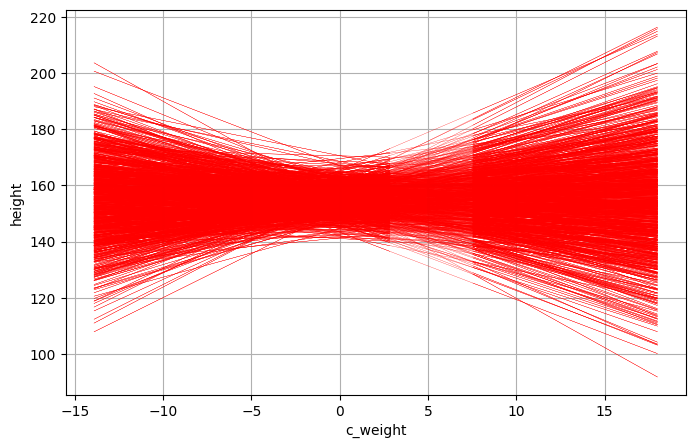

In [47]:
beta = dataframe['beta']
alpha = dataframe['alpha']

fig, ax = plt.subplots(figsize=(8, 5))

for i in range(R):
  ax.plot(d.c_weight, alpha[i] + beta[i] * d.c_weight, 'r', linewidth=0.2)

ax.set_ylabel("height")
ax.set_xlabel("c_weight")
ax.grid()

In [48]:
heights = dataframe.loc[:, "height[1]":"height[50]"].values
print("Minimum predicted height: ", heights.min())
print("Maximum predicted height: ", heights.max())

Minimum predicted height:  67.7964
Maximum predicted height:  244.377


The predicted heights are consistent with those observed in nature - they do not exceed the height of the tallest man (272 cm) nor do they fall below the minimum height (54 cm).

## Task 5. Modifying prior

If prior for beta admits negative values, then it makes no sense. Lets change prior to lognormal distribution.


In [49]:
model_ppc=CmdStanModel(stan_file='height_2b_ppc.stan')

18:07:47 - cmdstanpy - INFO - compiling stan file /content/height_2b_ppc.stan to exe file /content/height_2b_ppc
INFO:cmdstanpy:compiling stan file /content/height_2b_ppc.stan to exe file /content/height_2b_ppc
DEBUG:cmdstanpy:cmd: make /content/height_2b_ppc
cwd: /root/.cmdstan/cmdstan-2.31.0
DEBUG:cmdstanpy:Console output:

--- Translating Stan model to C++ code ---
bin/stanc  --o=/content/height_2b_ppc.hpp /content/height_2b_ppc.stan
Warning in '/content/height_2b_ppc.stan', line 3, column 4: Declaration of
    arrays by placing brackets after a variable name is deprecated and will
    be removed in Stan 2.32.0. Instead use the array keyword before the type.
    This can be changed automatically using the auto-format flag to stanc
Warning in '/content/height_2b_ppc.stan', line 11, column 3: Declaration of
    arrays by placing brackets after a variable name is deprecated and will
    be removed in Stan 2.32.0. Instead use the array keyword before the type.
    This can be changed au

In [50]:
sim=model_ppc.sample(data=data_sim, 
                     iter_sampling=R, 
                     iter_warmup=0, 
                     chains=1, 
                     refresh=R,
                     fixed_param=True,
                     seed=29042020)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp7h90x0b5/hfsnwj96.json
DEBUG:cmdstanpy:cmd: /content/height_2b_ppc info
cwd: None
18:08:00 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/height_2b_ppc', 'id=1', 'random', 'seed=29042020', 'data', 'file=/tmp/tmp7h90x0b5/hfsnwj96.json', 'output', 'file=/tmp/tmp7h90x0b5/height_2b_ppckw9_n6xv/height_2b_ppc-20230413180800.csv', 'refresh=1000', 'method=sample', 'num_samples=1000', 'num_warmup=0', 'algorithm=fixed_param']


18:08:01 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=1, chain_ids=[1], num_processes=1
 cmd (chain 1):
	['/content/height_2b_ppc', 'id=1', 'random', 'seed=29042020', 'data', 'file=/tmp/tmp7h90x0b5/hfsnwj96.json', 'output', 'file=/tmp/tmp7h90x0b5/height_2b_ppckw9_n6xv/height_2b_ppc-20230413180800.csv', 'refresh=1000', 'method=sample', 'num_samples=1000', 'num_warmup=0', 'algorithm=fixed_param']
 retcodes=[0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp7h90x0b5/height_2b_ppckw9_n6xv/height_2b_ppc-20230413180800.csv
 console_msgs (if any):
	/tmp/tmp7h90x0b5/height_2b_ppckw9_n6xv/height_2b_ppc-20230413180800_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 1000 (Default)
    num_warmup = 0
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.050000000000000003 (Default)
      delta = 0

In [51]:
dataframe = sim.draws_pd()
dataframe.head()

,lp__,accept_stat__,alpha,sigma,beta,height[1],height[2],height[3],height[4],height[5],...,height[41],height[42],height[43],height[44],height[45],height[46],height[47],height[48],height[49],height[50]
0,0.0,0.0,168.541,15.7772,0.280195,166.6540,142.902,168.890,184.101,201.111,...,190.287,201.831,196.595,176.590,150.860,164.358,168.744,185.270,177.904,183.740
1,0.0,0.0,149.005,14.9932,0.996298,153.3520,147.175,147.526,154.749,155.924,...,201.177,161.382,148.901,160.696,149.412,172.074,149.383,164.147,185.849,165.803
2,0.0,0.0,152.865,13.8614,0.294677,168.3980,146.346,146.925,157.727,154.992,...,180.682,138.262,177.803,161.678,184.354,157.540,171.386,164.010,157.425,161.129
3,0.0,0.0,150.089,14.7455,0.601751,161.3110,132.376,139.285,128.831,140.028,...,165.630,160.070,163.955,179.729,152.478,152.287,172.909,153.077,166.512,155.667
4,0.0,0.0,150.033,16.6710,0.495224,99.6235,133.603,130.716,131.207,166.010,...,182.253,178.221,144.506,159.988,155.042,150.142,149.125,170.938,168.217,145.381


1. Plot lines for each sampled slope beta and intercept alpha, verify if possible predicted heights are consistent with minimum (0) and maximum (check Wikipedia) heights observed in nature.


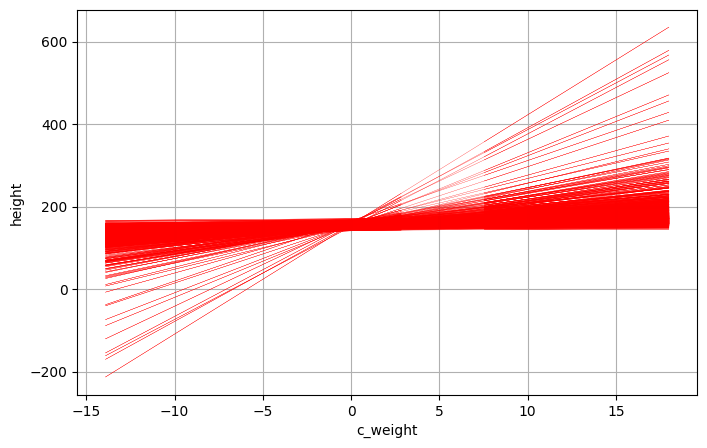

In [52]:
beta = dataframe['beta']
alpha = dataframe['alpha']

fig, ax = plt.subplots(figsize=(8, 5))

for i in range(R):
  ax.plot(d.c_weight, alpha[i] + beta[i] * d.c_weight, 'r', linewidth=0.2)

ax.set_ylabel("height")
ax.set_xlabel("c_weight")
ax.grid()

In [53]:
heights = dataframe.loc[:, "height[1]":"height[50]"].values
print("Minimum predicted height: ", heights.min())
print("Maximum predicted height: ", heights.max())

Minimum predicted height:  -199.605
Maximum predicted height:  618.525


Predicted heights are not entirely consistent with those observed in nature - there are some cases where predicted height is negative or is much higher than the height of the tallest man in the world.

2. For each simulated weight plot maximum, minimum, and 5, 25, 50, 75, 95 quantiles of simulated weight (all in the same plot). Compare with observed data. Is observed data possible within the prior model?

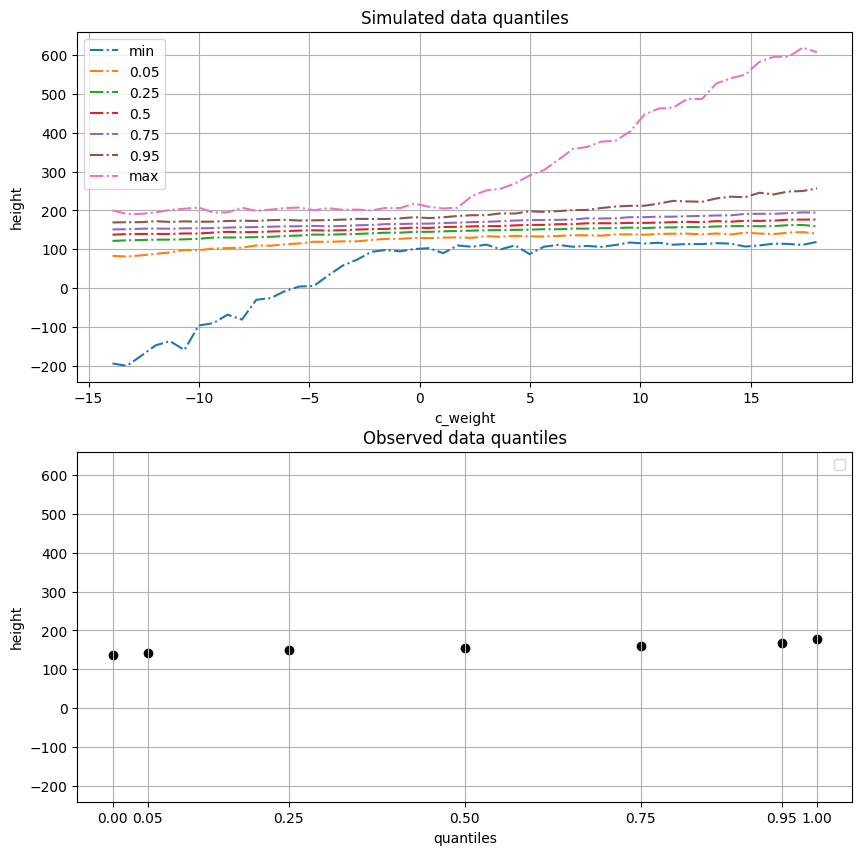

In [54]:
fig, axs = plt.subplots(2, 1, figsize=(10, 10), sharey=True)

quantiles_list = [0, 0.05, 0.25, 0.5, 0.75, 0.95, 1]
quantiles = np.quantile(heights, quantiles_list, axis=0)
weights = np.linspace(d.c_weight.min(),d.c_weight.max())
legend = ["min", "0.05", "0.25", "0.5", "0.75", "0.95", "max"]
for i in range(quantiles.shape[0]):
  axs[0].plot(weights, quantiles[i, :], '-.', label=legend[i])

axs[0].set_xlabel("c_weight")
axs[0].set_ylabel('height')
axs[0].set_title("Simulated data quantiles")
axs[0].grid()
axs[0].legend()



observed_quantiles = np.quantile(d.height, quantiles_list, axis=0)
axs[1].scatter(quantiles_list, observed_quantiles, color='k')
axs[1].set_xlabel("quantiles")
axs[1].set_ylabel('height')
axs[1].set_title("Observed data quantiles")
axs[1].set_xticks(quantiles_list)
axs[1].grid()
axs[1].legend()


Observed data is possible within prior model. 

## Task 6. Fitting and evaluating model


In [141]:
model_2_fit=CmdStanModel(stan_file='height_2_fit.stan')

20:29:32 - cmdstanpy - INFO - compiling stan file /content/height_2_fit.stan to exe file /content/height_2_fit
INFO:cmdstanpy:compiling stan file /content/height_2_fit.stan to exe file /content/height_2_fit
DEBUG:cmdstanpy:cmd: make /content/height_2_fit
cwd: /root/.cmdstan/cmdstan-2.31.0
DEBUG:cmdstanpy:Console output:

--- Translating Stan model to C++ code ---
bin/stanc  --o=/content/height_2_fit.hpp /content/height_2_fit.stan
Warning in '/content/height_2_fit.stan', line 3, column 4: Declaration of
    arrays by placing brackets after a variable name is deprecated and will
    be removed in Stan 2.32.0. Instead use the array keyword before the type.
    This can be changed automatically using the auto-format flag to stanc
Warning in '/content/height_2_fit.stan', line 4, column 4: Declaration of
    arrays by placing brackets after a variable name is deprecated and will
    be removed in Stan 2.32.0. Instead use the array keyword before the type.
    This can be changed automaticall

1. Create ```data_fit``` dictionary containing data from  ```N``` first rows of dataframe


In [142]:
N = 100
data_fit = {'N': N, 'weight': d.weight.values[:N], 'heights': d.height.values[:N]}
fit=model_2_fit.sample(data=data_fit,seed=28052020)


DEBUG:cmdstanpy:input tempfile: /tmp/tmp7h90x0b5/4et0mrbp.json
DEBUG:cmdstanpy:cmd: /content/height_2_fit info
cwd: None
20:29:48 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/height_2_fit', 'id=1', 'random', 'seed=28052020', 'data', 'file=/tmp/tmp7h90x0b5/4et0mrbp.json', 'output', 'file=/tmp/tmp7h90x0b5/height_2_fit37jldy13/height_2_fit-20230413202949_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/height_2_fit', 'id=2', 'random', 'seed=28052020', 'data', 'file=/tmp/tmp7h90x0b5/4et0mrbp.json', 'output', 'file=/tmp/tmp7h90x0b5/height_2_fit37jldy13/height_2_fit-20230413202949_2.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/height_2_fit', 'id=3', 'random', 'seed=28052020', 'data', 'file=/tmp/tmp7h90x0b5/4et0mrbp.json', 'output', 'file=/tmp/tmp7h90x0b5/height_2_fit37jldy13/height_2_fit-20230413202949_3.

20:29:51 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/height_2_fit', 'id=1', 'random', 'seed=28052020', 'data', 'file=/tmp/tmp7h90x0b5/4et0mrbp.json', 'output', 'file=/tmp/tmp7h90x0b5/height_2_fit37jldy13/height_2_fit-20230413202949_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp7h90x0b5/height_2_fit37jldy13/height_2_fit-20230413202949_1.csv
 console_msgs (if any):
	/tmp/tmp7h90x0b5/height_2_fit37jldy13/height_2_fit-20230413202949_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 1000 (Default)
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.050000000000000003 (Default)
      delta = 0.800000000

In [143]:
dataframe = fit.draws_pd()
dataframe.head()

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,sigma,alpha,beta,...,height_mu[91],height_mu[92],height_mu[93],height_mu[94],height_mu[95],height_mu[96],height_mu[97],height_mu[98],height_mu[99],height_mu[100]
0,-273.651,0.965801,0.153519,5.0,31.0,0.0,276.959,11.28220,143.208,0.223785,...,167.476,159.796,153.307,148.680,162.015,128.289,153.460,159.873,140.964,150.632
1,-274.672,0.989985,0.153519,4.0,15.0,0.0,275.213,11.83970,144.388,0.278299,...,178.528,164.070,160.864,158.558,175.313,141.288,164.458,172.650,148.262,163.605
2,-272.774,0.970313,0.153519,5.0,31.0,0.0,275.796,9.68657,137.712,0.337568,...,169.677,143.804,153.627,152.571,152.170,151.154,156.711,172.654,153.158,149.897
3,-271.481,0.944267,0.153519,2.0,3.0,0.0,273.670,9.69787,137.621,0.356171,...,160.822,155.929,138.337,134.921,159.188,156.187,176.877,167.704,162.765,158.103
4,-272.384,0.953260,0.153519,4.0,23.0,0.0,273.285,10.52480,139.788,0.373295,...,160.990,152.717,148.804,152.395,163.300,152.285,170.164,155.896,157.740,154.120


2. Plot lines for each sampled slope beta and intercept alpha. Verify how uncertainity changes with increasing of sample (N)



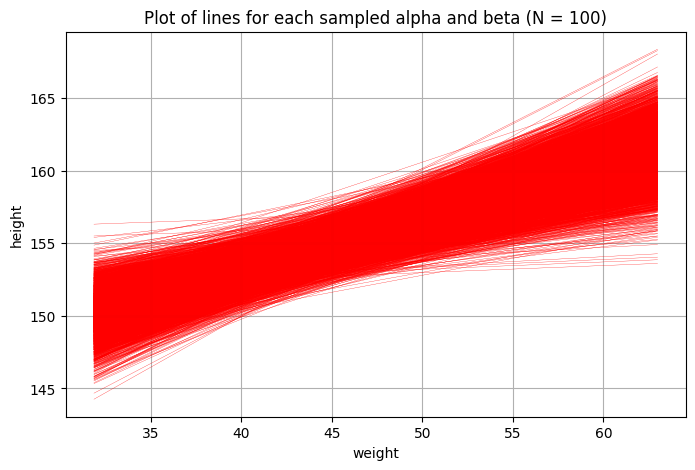

In [144]:
beta = dataframe['beta']
alpha = dataframe['alpha']

fig, ax = plt.subplots(figsize=(8, 5))

weights = np.linspace(d.weight[:N].min(), d.weight[:N].max())
for i in range(len(dataframe)):
  ax.plot(weights, alpha[i] + beta[i] * weights, 'r', linewidth=0.2)

ax.set_ylabel("height")
ax.set_xlabel("weight")
ax.set_title(f'Plot of lines for each sampled alpha and beta (N = {N})')
ax.grid()

DEBUG:cmdstanpy:input tempfile: /tmp/tmp7h90x0b5/i7lyf06l.json
DEBUG:cmdstanpy:cmd: /content/height_2_fit info
cwd: None
20:30:11 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/height_2_fit', 'id=1', 'random', 'seed=28052020', 'data', 'file=/tmp/tmp7h90x0b5/i7lyf06l.json', 'output', 'file=/tmp/tmp7h90x0b5/height_2_fitgx4ey8g1/height_2_fit-20230413203011_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/height_2_fit', 'id=2', 'random', 'seed=28052020', 'data', 'file=/tmp/tmp7h90x0b5/i7lyf06l.json', 'output', 'file=/tmp/tmp7h90x0b5/height_2_fitgx4ey8g1/height_2_fit-20230413203011_2.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/height_2_fit', 'id=3', 'random', 'seed=28052020', 'data', 'file=/tmp/tmp7h90x0b5/i7lyf06l.json', 'output', 'file=/tmp/tmp7h90x0b5/height_2_fitgx4ey8g1/height_2_fit-20230413203011_3.

20:30:13 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/height_2_fit', 'id=1', 'random', 'seed=28052020', 'data', 'file=/tmp/tmp7h90x0b5/i7lyf06l.json', 'output', 'file=/tmp/tmp7h90x0b5/height_2_fitgx4ey8g1/height_2_fit-20230413203011_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp7h90x0b5/height_2_fitgx4ey8g1/height_2_fit-20230413203011_1.csv
 console_msgs (if any):
	/tmp/tmp7h90x0b5/height_2_fitgx4ey8g1/height_2_fit-20230413203011_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 1000 (Default)
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.050000000000000003 (Default)
      delta = 0.800000000

DEBUG:cmdstanpy:input tempfile: /tmp/tmp7h90x0b5/seo9qfhw.json
DEBUG:cmdstanpy:cmd: /content/height_2_fit info
cwd: None
20:30:16 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/height_2_fit', 'id=1', 'random', 'seed=28052020', 'data', 'file=/tmp/tmp7h90x0b5/seo9qfhw.json', 'output', 'file=/tmp/tmp7h90x0b5/height_2_fitwq3oyb9w/height_2_fit-20230413203016_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/height_2_fit', 'id=2', 'random', 'seed=28052020', 'data', 'file=/tmp/tmp7h90x0b5/seo9qfhw.json', 'output', 'file=/tmp/tmp7h90x0b5/height_2_fitwq3oyb9w/height_2_fit-20230413203016_2.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/height_2_fit', 'id=3', 'random', 'seed=28052020', 'data', 'file=/tmp/tmp7h90x0b5/seo9qfhw.json', 'output', 'file=/tmp/tmp7h90x0b5/height_2_fitwq3oyb9w/height_2_fit-20230413203016_3.

20:30:20 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/height_2_fit', 'id=1', 'random', 'seed=28052020', 'data', 'file=/tmp/tmp7h90x0b5/seo9qfhw.json', 'output', 'file=/tmp/tmp7h90x0b5/height_2_fitwq3oyb9w/height_2_fit-20230413203016_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp7h90x0b5/height_2_fitwq3oyb9w/height_2_fit-20230413203016_1.csv
 console_msgs (if any):
	/tmp/tmp7h90x0b5/height_2_fitwq3oyb9w/height_2_fit-20230413203016_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 1000 (Default)
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.050000000000000003 (Default)
      delta = 0.800000000

DEBUG:cmdstanpy:input tempfile: /tmp/tmp7h90x0b5/qk835rnj.json
DEBUG:cmdstanpy:cmd: /content/height_2_fit info
cwd: None
20:30:24 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/height_2_fit', 'id=1', 'random', 'seed=28052020', 'data', 'file=/tmp/tmp7h90x0b5/qk835rnj.json', 'output', 'file=/tmp/tmp7h90x0b5/height_2_fit7e9atckd/height_2_fit-20230413203024_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/height_2_fit', 'id=2', 'random', 'seed=28052020', 'data', 'file=/tmp/tmp7h90x0b5/qk835rnj.json', 'output', 'file=/tmp/tmp7h90x0b5/height_2_fit7e9atckd/height_2_fit-20230413203024_2.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/height_2_fit', 'id=3', 'random', 'seed=28052020', 'data', 'file=/tmp/tmp7h90x0b5/qk835rnj.json', 'output', 'file=/tmp/tmp7h90x0b5/height_2_fit7e9atckd/height_2_fit-20230413203024_3.

20:30:27 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/height_2_fit', 'id=1', 'random', 'seed=28052020', 'data', 'file=/tmp/tmp7h90x0b5/qk835rnj.json', 'output', 'file=/tmp/tmp7h90x0b5/height_2_fit7e9atckd/height_2_fit-20230413203024_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp7h90x0b5/height_2_fit7e9atckd/height_2_fit-20230413203024_1.csv
 console_msgs (if any):
	/tmp/tmp7h90x0b5/height_2_fit7e9atckd/height_2_fit-20230413203024_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 1000 (Default)
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.050000000000000003 (Default)
      delta = 0.800000000

DEBUG:cmdstanpy:input tempfile: /tmp/tmp7h90x0b5/dsedc0pk.json
DEBUG:cmdstanpy:cmd: /content/height_2_fit info
cwd: None
20:30:31 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/height_2_fit', 'id=1', 'random', 'seed=28052020', 'data', 'file=/tmp/tmp7h90x0b5/dsedc0pk.json', 'output', 'file=/tmp/tmp7h90x0b5/height_2_fitkr1502ft/height_2_fit-20230413203031_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/height_2_fit', 'id=2', 'random', 'seed=28052020', 'data', 'file=/tmp/tmp7h90x0b5/dsedc0pk.json', 'output', 'file=/tmp/tmp7h90x0b5/height_2_fitkr1502ft/height_2_fit-20230413203031_2.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/height_2_fit', 'id=3', 'random', 'seed=28052020', 'data', 'file=/tmp/tmp7h90x0b5/dsedc0pk.json', 'output', 'file=/tmp/tmp7h90x0b5/height_2_fitkr1502ft/height_2_fit-20230413203031_3.

20:30:38 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/height_2_fit', 'id=1', 'random', 'seed=28052020', 'data', 'file=/tmp/tmp7h90x0b5/dsedc0pk.json', 'output', 'file=/tmp/tmp7h90x0b5/height_2_fitkr1502ft/height_2_fit-20230413203031_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp7h90x0b5/height_2_fitkr1502ft/height_2_fit-20230413203031_1.csv
 console_msgs (if any):
	/tmp/tmp7h90x0b5/height_2_fitkr1502ft/height_2_fit-20230413203031_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 1000 (Default)
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.050000000000000003 (Default)
      delta = 0.800000000

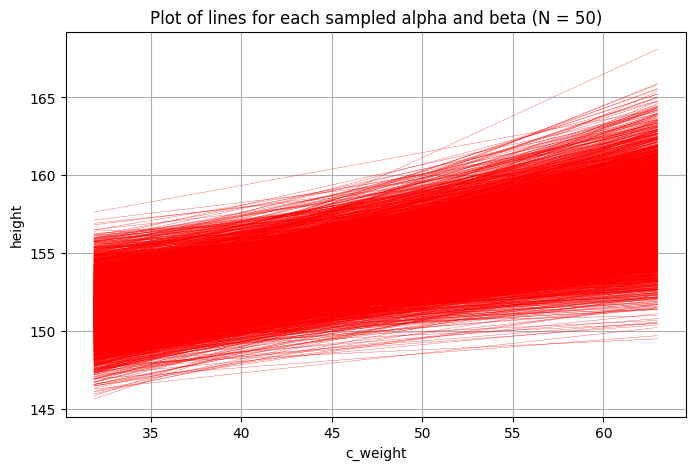

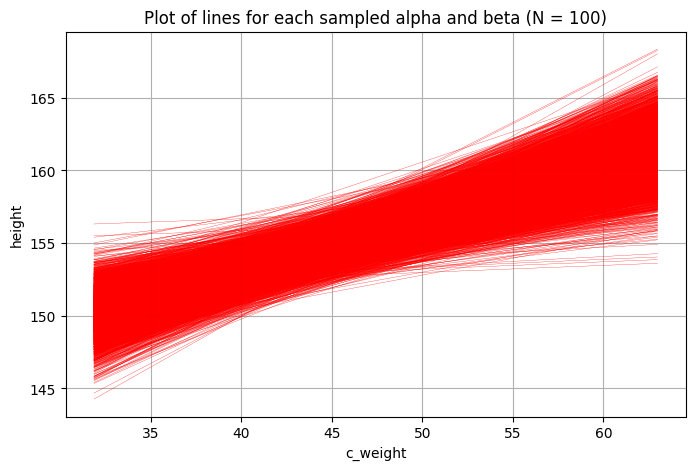

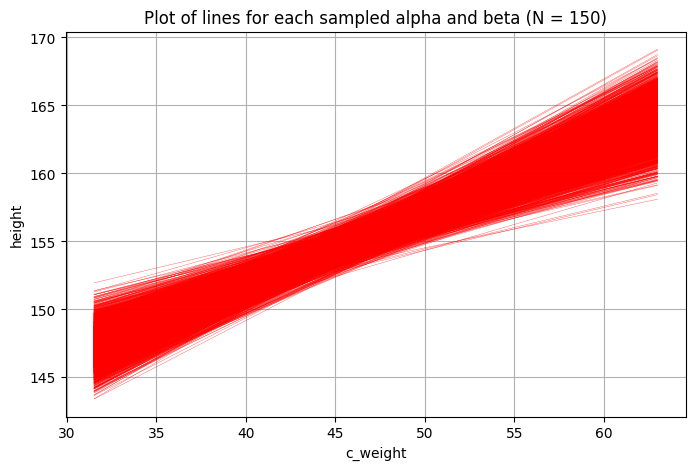

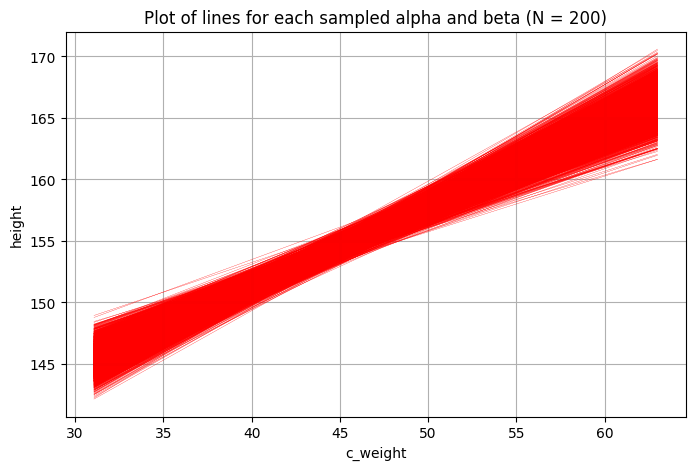

In [145]:
N_list = [50, 100, 150, 200]

for N in N_list:
  data_fit = {'N': N, 'weight': d.weight.values[:N], 'heights': d.height.values[:N]}
  fit=model_2_fit.sample(data=data_fit,seed=28052020)
  dataframe = fit.draws_pd()

  beta = dataframe['beta']
  alpha = dataframe['alpha']

  fig, ax = plt.subplots(figsize=(8, 5))

  weights = np.linspace(d.weight[:N].min(), d.weight[:N].max())
  for i in range(len(dataframe)):
    ax.plot(weights, alpha[i] + beta[i] * weights, 'r', linewidth=0.2)

  ax.set_ylabel("height")
  ax.set_xlabel("c_weight")
  ax.set_title(f'Plot of lines for each sampled alpha and beta (N = {N})')
  ax.grid()

3. For each value of weight plot mean simulated height along with errorbar of one standard deviation (use ```errorbar``` from matplotlib). Compare with observed data (N points). Is observed data possible within the posterior model? What changes when N increases.

DEBUG:cmdstanpy:input tempfile: /tmp/tmp7h90x0b5/__dbo1ey.json
DEBUG:cmdstanpy:cmd: /content/height_2_fit info
cwd: None
20:30:57 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/height_2_fit', 'id=1', 'random', 'seed=28052020', 'data', 'file=/tmp/tmp7h90x0b5/__dbo1ey.json', 'output', 'file=/tmp/tmp7h90x0b5/height_2_fitsjwi62q1/height_2_fit-20230413203057_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/height_2_fit', 'id=2', 'random', 'seed=28052020', 'data', 'file=/tmp/tmp7h90x0b5/__dbo1ey.json', 'output', 'file=/tmp/tmp7h90x0b5/height_2_fitsjwi62q1/height_2_fit-20230413203057_2.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/height_2_fit', 'id=3', 'random', 'seed=28052020', 'data', 'file=/tmp/tmp7h90x0b5/__dbo1ey.json', 'output', 'file=/tmp/tmp7h90x0b5/height_2_fitsjwi62q1/height_2_fit-20230413203057_3.

20:30:59 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/height_2_fit', 'id=1', 'random', 'seed=28052020', 'data', 'file=/tmp/tmp7h90x0b5/__dbo1ey.json', 'output', 'file=/tmp/tmp7h90x0b5/height_2_fitsjwi62q1/height_2_fit-20230413203057_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp7h90x0b5/height_2_fitsjwi62q1/height_2_fit-20230413203057_1.csv
 console_msgs (if any):
	/tmp/tmp7h90x0b5/height_2_fitsjwi62q1/height_2_fit-20230413203057_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 1000 (Default)
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.050000000000000003 (Default)
      delta = 0.800000000

DEBUG:cmdstanpy:input tempfile: /tmp/tmp7h90x0b5/qj23ld36.json
DEBUG:cmdstanpy:cmd: /content/height_2_fit info
cwd: None
20:31:26 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/height_2_fit', 'id=1', 'random', 'seed=28052020', 'data', 'file=/tmp/tmp7h90x0b5/qj23ld36.json', 'output', 'file=/tmp/tmp7h90x0b5/height_2_fitvetylpje/height_2_fit-20230413203126_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/height_2_fit', 'id=2', 'random', 'seed=28052020', 'data', 'file=/tmp/tmp7h90x0b5/qj23ld36.json', 'output', 'file=/tmp/tmp7h90x0b5/height_2_fitvetylpje/height_2_fit-20230413203126_2.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/height_2_fit', 'id=3', 'random', 'seed=28052020', 'data', 'file=/tmp/tmp7h90x0b5/qj23ld36.json', 'output', 'file=/tmp/tmp7h90x0b5/height_2_fitvetylpje/height_2_fit-20230413203126_3.

20:31:29 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/height_2_fit', 'id=1', 'random', 'seed=28052020', 'data', 'file=/tmp/tmp7h90x0b5/qj23ld36.json', 'output', 'file=/tmp/tmp7h90x0b5/height_2_fitvetylpje/height_2_fit-20230413203126_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp7h90x0b5/height_2_fitvetylpje/height_2_fit-20230413203126_1.csv
 console_msgs (if any):
	/tmp/tmp7h90x0b5/height_2_fitvetylpje/height_2_fit-20230413203126_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 1000 (Default)
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.050000000000000003 (Default)
      delta = 0.800000000

DEBUG:cmdstanpy:input tempfile: /tmp/tmp7h90x0b5/2yzu4zpp.json
DEBUG:cmdstanpy:cmd: /content/height_2_fit info
cwd: None
20:32:19 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/height_2_fit', 'id=1', 'random', 'seed=28052020', 'data', 'file=/tmp/tmp7h90x0b5/2yzu4zpp.json', 'output', 'file=/tmp/tmp7h90x0b5/height_2_fitr3lvuied/height_2_fit-20230413203219_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/height_2_fit', 'id=2', 'random', 'seed=28052020', 'data', 'file=/tmp/tmp7h90x0b5/2yzu4zpp.json', 'output', 'file=/tmp/tmp7h90x0b5/height_2_fitr3lvuied/height_2_fit-20230413203219_2.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/height_2_fit', 'id=3', 'random', 'seed=28052020', 'data', 'file=/tmp/tmp7h90x0b5/2yzu4zpp.json', 'output', 'file=/tmp/tmp7h90x0b5/height_2_fitr3lvuied/height_2_fit-20230413203219_3.

20:32:24 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/height_2_fit', 'id=1', 'random', 'seed=28052020', 'data', 'file=/tmp/tmp7h90x0b5/2yzu4zpp.json', 'output', 'file=/tmp/tmp7h90x0b5/height_2_fitr3lvuied/height_2_fit-20230413203219_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp7h90x0b5/height_2_fitr3lvuied/height_2_fit-20230413203219_1.csv
 console_msgs (if any):
	/tmp/tmp7h90x0b5/height_2_fitr3lvuied/height_2_fit-20230413203219_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 1000 (Default)
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.050000000000000003 (Default)
      delta = 0.800000000

DEBUG:cmdstanpy:input tempfile: /tmp/tmp7h90x0b5/ol_22uu2.json
DEBUG:cmdstanpy:cmd: /content/height_2_fit info
cwd: None
20:33:09 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/height_2_fit', 'id=1', 'random', 'seed=28052020', 'data', 'file=/tmp/tmp7h90x0b5/ol_22uu2.json', 'output', 'file=/tmp/tmp7h90x0b5/height_2_fitt1jgxk82/height_2_fit-20230413203309_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/height_2_fit', 'id=2', 'random', 'seed=28052020', 'data', 'file=/tmp/tmp7h90x0b5/ol_22uu2.json', 'output', 'file=/tmp/tmp7h90x0b5/height_2_fitt1jgxk82/height_2_fit-20230413203309_2.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/height_2_fit', 'id=3', 'random', 'seed=28052020', 'data', 'file=/tmp/tmp7h90x0b5/ol_22uu2.json', 'output', 'file=/tmp/tmp7h90x0b5/height_2_fitt1jgxk82/height_2_fit-20230413203309_3.

20:33:14 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/height_2_fit', 'id=1', 'random', 'seed=28052020', 'data', 'file=/tmp/tmp7h90x0b5/ol_22uu2.json', 'output', 'file=/tmp/tmp7h90x0b5/height_2_fitt1jgxk82/height_2_fit-20230413203309_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp7h90x0b5/height_2_fitt1jgxk82/height_2_fit-20230413203309_1.csv
 console_msgs (if any):
	/tmp/tmp7h90x0b5/height_2_fitt1jgxk82/height_2_fit-20230413203309_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 1000 (Default)
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.050000000000000003 (Default)
      delta = 0.800000000

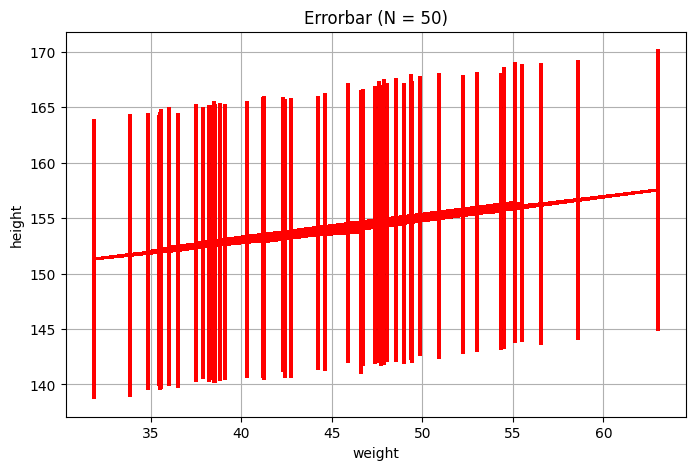

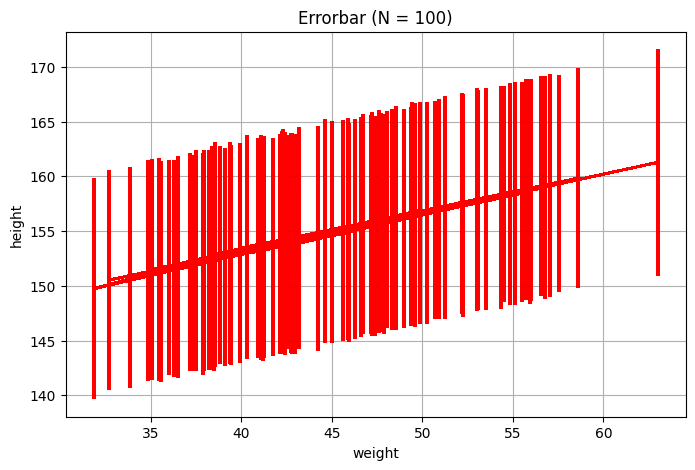

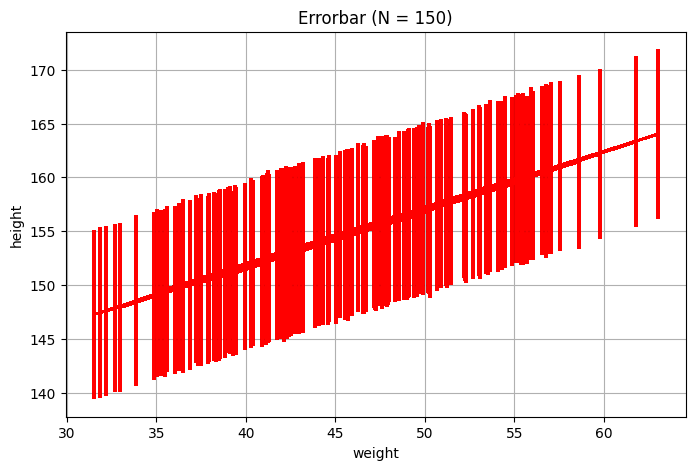

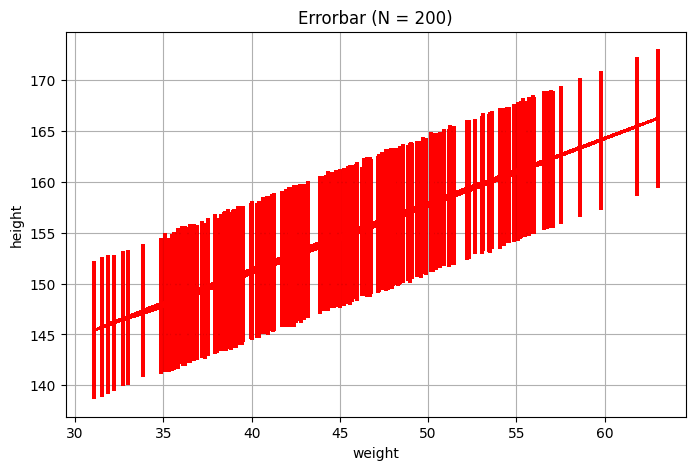

In [146]:
N_list = [50, 100, 150, 200]

for N in N_list:
  data_fit = {'N': N, 'weight': d.weight.values[:N], 'heights': d.height.values[:N]}
  fit=model_2_fit.sample(data=data_fit,seed=28052020)
  dataframe = fit.draws_pd()

  beta = dataframe['beta']
  alpha = dataframe['alpha']

  fig, ax = plt.subplots(figsize=(8, 5))

  height = fit.stan_variable('height_mu')
  heights_mean = height.mean(axis=0)
  heights_std = height.std(axis=0)

  weights = np.linspace(d.weight[:N].min(), d.weight[:N].max())
  for i in range(len(dataframe)):
    ax.errorbar(d.weight.values[:N], heights_mean, heights_std, color = 'r')

  ax.set_ylabel("height")
  ax.set_xlabel("weight")
  ax.set_title(f'Errorbar (N = {N})')
  ax.grid()

The higher the value of N the smaller the error (shorter errorbar).

## Task 7. Extending the model

1. Center the weight data (substract mean vaule of weight from all values). Test how model works for such data. What is the interpretation of $\alpha$ in such case?


DEBUG:cmdstanpy:input tempfile: /tmp/tmp7h90x0b5/m75to2o0.json
DEBUG:cmdstanpy:cmd: /content/height_2_fit info
cwd: None
20:38:34 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/height_2_fit', 'id=1', 'random', 'seed=28052020', 'data', 'file=/tmp/tmp7h90x0b5/m75to2o0.json', 'output', 'file=/tmp/tmp7h90x0b5/height_2_fitcgttc234/height_2_fit-20230413203834_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/height_2_fit', 'id=2', 'random', 'seed=28052020', 'data', 'file=/tmp/tmp7h90x0b5/m75to2o0.json', 'output', 'file=/tmp/tmp7h90x0b5/height_2_fitcgttc234/height_2_fit-20230413203834_2.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/height_2_fit', 'id=3', 'random', 'seed=28052020', 'data', 'file=/tmp/tmp7h90x0b5/m75to2o0.json', 'output', 'file=/tmp/tmp7h90x0b5/height_2_fitcgttc234/height_2_fit-20230413203834_3.

20:38:37 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/height_2_fit', 'id=1', 'random', 'seed=28052020', 'data', 'file=/tmp/tmp7h90x0b5/m75to2o0.json', 'output', 'file=/tmp/tmp7h90x0b5/height_2_fitcgttc234/height_2_fit-20230413203834_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp7h90x0b5/height_2_fitcgttc234/height_2_fit-20230413203834_1.csv
 console_msgs (if any):
	/tmp/tmp7h90x0b5/height_2_fitcgttc234/height_2_fit-20230413203834_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 1000 (Default)
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.050000000000000003 (Default)
      delta = 0.800000000

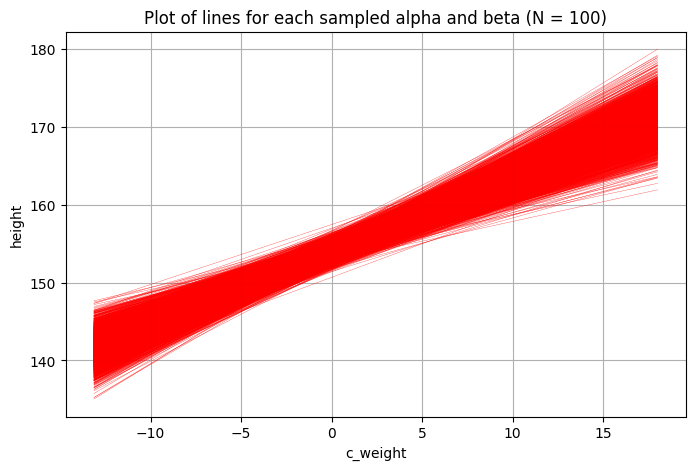

In [147]:
N = 100

data_fit = {'N': N, 'weight': d.c_weight.values[:N], 'heights': d.height.values[:N]}
fit=model_2_fit.sample(data=data_fit,seed=28052020)
dataframe = fit.draws_pd()

beta = dataframe['beta']
alpha = dataframe['alpha']

fig, ax = plt.subplots(figsize=(8, 5))

c_weights = np.linspace(d.c_weight[:N].min(), d.c_weight[:N].max())
for i in range(len(dataframe)):
  ax.plot(c_weights, alpha[i] + beta[i] * c_weights, 'r', linewidth=0.2)

ax.set_ylabel("height")
ax.set_xlabel("c_weight")
ax.set_title(f'Plot of lines for each sampled alpha and beta (N = {N})')
ax.grid()

2. Using centered data modify your model with a second power of weight, select prior for its coefficient using prior predictive checks and after fitting check if model is still good.
3. Try to vectorize the model to avoid necessity of a for loop in the ```model``` block. 

In [148]:
model_2_fit_modified=CmdStanModel(stan_file='height_2_fit_modified.stan')

21:17:15 - cmdstanpy - INFO - compiling stan file /content/height_2_fit_modified.stan to exe file /content/height_2_fit_modified
INFO:cmdstanpy:compiling stan file /content/height_2_fit_modified.stan to exe file /content/height_2_fit_modified
DEBUG:cmdstanpy:cmd: make /content/height_2_fit_modified
cwd: /root/.cmdstan/cmdstan-2.31.0
DEBUG:cmdstanpy:Console output:

--- Translating Stan model to C++ code ---
bin/stanc  --o=/content/height_2_fit_modified.hpp /content/height_2_fit_modified.stan
Warning in '/content/height_2_fit_modified.stan', line 29, column 3: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc

--- Compiling, linking C++ code ---
g++ -std=c++1y -pthread -D_REENTRANT -Wno-sign-compare -Wno-ignored-attributes      -I stan/lib/stan_math/lib/tbb_2020.3/include    -O3 -I src -I stan

DEBUG:cmdstanpy:input tempfile: /tmp/tmp7h90x0b5/ut50gqbu.json
DEBUG:cmdstanpy:cmd: /content/height_2_fit_modified info
cwd: None
21:21:46 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/height_2_fit_modified', 'id=1', 'random', 'seed=28052020', 'data', 'file=/tmp/tmp7h90x0b5/ut50gqbu.json', 'output', 'file=/tmp/tmp7h90x0b5/height_2_fit_modifiedilwcn9o5/height_2_fit_modified-20230413212146_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/height_2_fit_modified', 'id=2', 'random', 'seed=28052020', 'data', 'file=/tmp/tmp7h90x0b5/ut50gqbu.json', 'output', 'file=/tmp/tmp7h90x0b5/height_2_fit_modifiedilwcn9o5/height_2_fit_modified-20230413212146_2.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/height_2_fit_modified', 'id=3', 'random', 'seed=28052020', 'data', 'file=/tmp/tmp7h90x0b5/ut50gqbu.json', 'output', 'file=/tmp/

21:21:51 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/height_2_fit_modified', 'id=1', 'random', 'seed=28052020', 'data', 'file=/tmp/tmp7h90x0b5/ut50gqbu.json', 'output', 'file=/tmp/tmp7h90x0b5/height_2_fit_modifiedilwcn9o5/height_2_fit_modified-20230413212146_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp7h90x0b5/height_2_fit_modifiedilwcn9o5/height_2_fit_modified-20230413212146_1.csv
 console_msgs (if any):
	/tmp/tmp7h90x0b5/height_2_fit_modifiedilwcn9o5/height_2_fit_modified-20230413212146_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 1000 (Default)
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      g

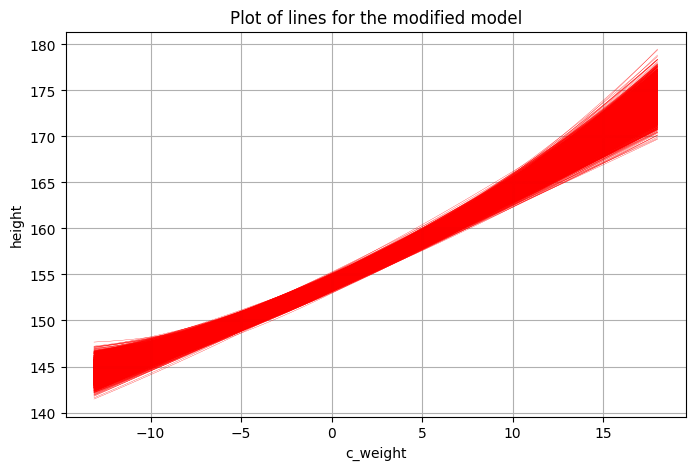

In [151]:
data_fit = {'N': len(d), 'weight': d.c_weight.values, 'heights': d.height.values}
fit=model_2_fit_modified.sample(data=data_fit,seed=28052020)
dataframe = fit.draws_pd()

beta = dataframe['beta']
alpha = dataframe['alpha']
gamma = dataframe['gamma']

fig, ax = plt.subplots(figsize=(8, 5))

c_weights = np.linspace(d.c_weight[:N].min(), d.c_weight[:N].max())
for i in range(len(dataframe)):
  ax.plot(c_weights, alpha[i] + beta[i] * c_weights + gamma[i] * c_weights * c_weights, 'r', linewidth=0.2)

ax.set_ylabel("height")
ax.set_xlabel("c_weight")
ax.set_title(f'Plot of lines for the modified model')
ax.grid()

Model quality is still good.